# **Impactos da Inova√ß√£o e da Liberdade Econ√¥mica na Renda Per Capita: Uma An√°lise Regressiva**

## A amostra est√° bastante diversa, contando com a seguinte quantidade de pa√≠ses por continente: Am√©rica: 21, Europa: 44, Oceania: 2, √Åfrica: 30 e √Åsia: 32 pa√≠ses.

## Lembrando: os dados de Renda per capita aqui utilizados s√£o o PIB per Capita por Paridade do Poder de Compra.
## o PIB per Capita PPC calcula o "valor de todos os finais de bens e servi√ßos produzidos no √¢mbito de uma na√ß√£o em determinado ano dividido pela popula√ß√£o m√©dia para o mesmo ano."
## - Cor√©ia do Norte: A √∫ltima estimativa desse dado para esse pa√≠s √© de 2015. Considerando que ele vem tendo resultados econ√¥micos p√©ssimos no √∫ltims anos, preferi utilizar desse dado estimado em 2015 mesmo.

### Bibliotecas

In [ ]:
import pandas as pd
import gspread
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np
import statsmodels.api as sm

#Acessar a planilha com os dados dos pa√≠ses

In [ ]:
url = "https://docs.google.com/spreadsheets/d/1pKewi3DlY2hadaFdPWB8KSfu7MSK6XFA/export?format=csv"
dados = pd.read_csv(url)

In [ ]:
dados


country    xI    xL       Y        continente
0       Switzerland  67.6  83.0   83598            Europa
1            Sweden  64.2  77.5   64578            Europa
2     United States  63.5  70.1   76399  Am√©rica do Norte
3    United Kingdom  62.4  68.6   54603            Europa
4         Singapore  61.5  83.5  127565              √Åsia
..              ...   ...   ...     ...               ...
124         Uruguay  30.0  69.8   28842    Am√©rica do Sul
125         Armenia  28.0  64.9   18942            Europa
126       Argentina  28.0  49.9   26505    Am√©rica do Sul
127           Benin  16.0  57.7    4056            √Åfrica
128          Uganda  16.0  50.7    2694            √Åfrica

[129 rows x 5 columns]

In [ ]:
#Ajeitando os dados para evitar problemas:

#Converter a coluna Y, renda per capita, para num√©rico
dados['Y'] = pd.to_numeric(dados['Y'], errors='coerce').round()

# Remover a coluna Unnamed, se existir
dados = dados.loc[:, ~dados.columns.str.contains('^Unnamed')]



---



In [ ]:
# quero somar quantos pa√≠ses eu tenho na amostra por continente:
paises_por_continente = dados.groupby('continente')['country'].count()
print(paises_por_continente)

continente
Am√©rica Central        8
Am√©rica do Central     1
Am√©rica do Norte       3
Am√©rica do Sul         9
Europa                44
Oceania                2
√Åfrica                30
√Åsia                  32
Name: country, dtype: int64


## Visualizar os dados

## Inova√ß√£o vs Renda por pa√≠s

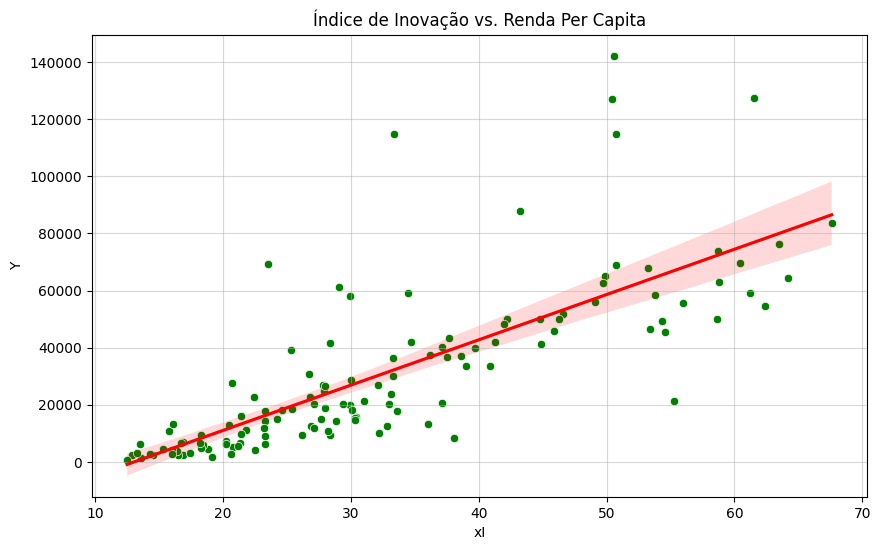

In [ ]:
# Visualizar xI vs Y em um gr√°fico de dispers√£o feito no seaborn
plt.figure(figsize=(10, 6))

sns.scatterplot(x='xI', y='Y', data=dados, color = 'green')

plt.title('√çndice de Inova√ß√£o vs. Renda Per Capita')
plt.xlabel('Inova√ß√£o')
plt.ylabel('Renda Per Capita')
plt.grid(True, alpha = 0.5)

# Adicionando uma linha de tend√™ncia
sns.regplot(x='xI', y='Y', data=dados, scatter=False, color='red')

plt.show()

## Liberdade econ√¥mica vs Renda por pa√≠s

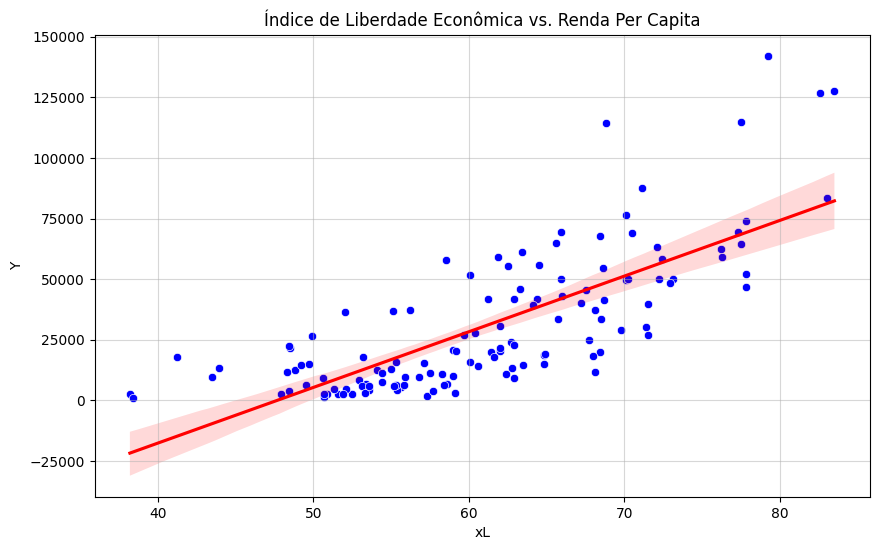

In [ ]:
# Visualizar xL vs Y em um gr√°fico de dispers√£o feito no seaborn
plt.figure(figsize=(10, 6))

sns.scatterplot(x='xL', y='Y', data=dados, color = 'blue')
plt.title('√çndice de Liberdade Econ√¥mica vs. Renda Per Capita')
plt.xlabel('Liberdade Econ√¥mica')
plt.ylabel('Renda Per Capita')
plt.grid(True, alpha = 0.5)
# Adicionando uma linha de tend√™ncia
sns.regplot(x='xL', y='Y', data=dados, scatter=False, color='red')

plt.show()

## Inova√ß√£o vs Liberdade econ√¥mica por pa√≠s

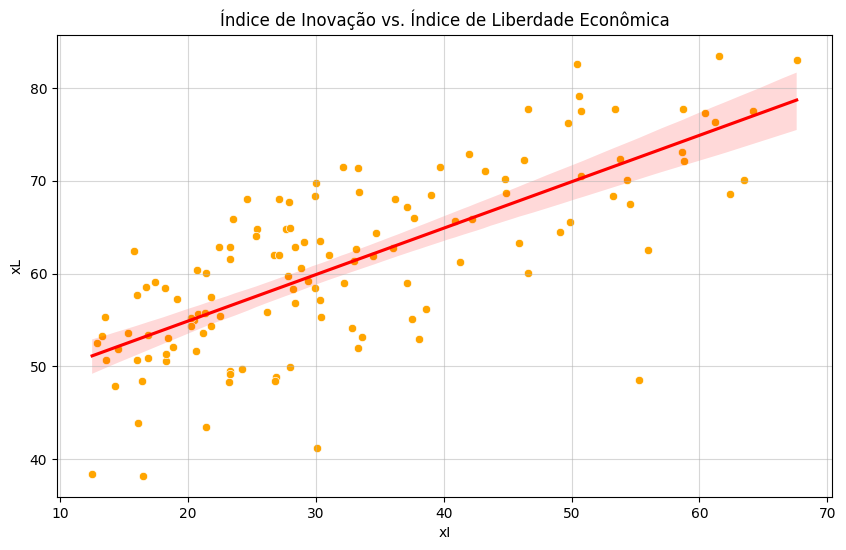

In [ ]:
# Visualizar xI vs xL em um gr√°fico de dispers√£o feito no seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xI', y='xL', data=dados, color = 'orange')
plt.title('√çndice de Inova√ß√£o vs. √çndice de Liberdade Econ√¥mica')
plt.grid(True, alpha = 0.5)
plt.xlabel('Inova√ß√£o')
plt.ylabel('Liberdade Econ√¥mica')
#Adicionando uma linha de tend√™ncia
sns.regplot(x='xI', y='xL', data=dados, scatter=False, color='red')
plt.show()



---





---



## Vou calcular algumas estat√≠sticas interessantes com esses dados:

## 1. Estat√≠sticas Descritivas

In [ ]:
# 1. Estat√≠sticas Descritivas:
estatisticas_descritivas = dados[['Y', 'xI', 'xL']].describe()
estatisticas_descritivas_por_continente = dados.groupby('continente')[['Y', 'xI', 'xL']].describe()
print("Estat√≠sticas Descritivas da amostra:")
print(estatisticas_descritivas)
print()
print()
print("Estat√≠sticas Descritivas por Continente:")
print(estatisticas_descritivas_por_continente)

Estat√≠sticas Descritivas da amostra:
                   Y          xI          xL
count     129.000000  129.000000  129.000000
mean    31129.937984   32.655814   61.222481
std     28960.040757   14.108840    9.546156
min       836.000000   12.500000   38.200000
25%      9519.000000   21.400000   54.100000
50%     20377.000000   29.400000   61.400000
75%     48397.000000   42.000000   68.100000
max    142214.000000   67.600000   83.500000


Estat√≠sticas Descritivas por Continente:
                       Y                                                 \
                   count          mean           std      min       25%   
continente                                                                
Am√©rica Central      8.0  17416.625000  11841.800852   6741.0   9832.25   
Am√©rica do Central   1.0  22834.000000           NaN  22834.0  22834.00   
Am√©rica do Norte     3.0  52103.666667  27979.966982  21512.0  39956.00   
Am√©rica do Sul       9.0  19688.444444   7308.577959   9684

## Maiores e menores √≠ndices de inova√ß√£o da amostra:

In [ ]:
#Calcular o maior valor da coluna xI (maior √≠ndice de inova√ß√£o)
dados[dados['xI'] == dados['xI'].max()]
print("Dados do pa√≠s com o maior √≠ndice de inova√ß√£o:")
print(dados[dados['xI'] == dados['xI'].max()])

Dados do pa√≠s com o maior √≠ndice de inova√ß√£o:
       country    xI    xL      Y continente
0  Switzerland  67.6  83.0  83598     Europa


In [ ]:
# calcular o menor valor da coluna xI
menor_valor = dados['xI'].min()

# encontrar o pa√≠s com o menor valor da coluna xI
print('Dados do pa√≠s com omenor √≠ndice de inova√ß√£o da amostra:')
print(dados[dados['xI'] == dados['xI'].min()])

Dados do pa√≠s com omenor √≠ndice de inova√ß√£o da amostra:
    country    xI    xL    Y continente
84  Burundi  12.5  38.4  836     √Åfrica


## Maiores e menores √≠ndices de liberdade econ√¥mica da amostra:

In [ ]:
#Calculando os maiores e os menores √≠ndices de inova√ß√£o e liberdade econ√¥mica das amostra:
dados[dados['xL'] == dados['xL'].max]
print("Dados do pa√≠s com o maior √≠ndice de liberdade econ√¥mica:")
print(dados[dados['xL'] == dados['xL'].max()])
print()
print()
dados[dados['xL'] == dados['xL'].min()]
print("Dados do pa√≠s com o menor √≠ndice de liberdade econ√¥mica:")
print(dados[dados['xL'] == dados['xL'].min()])

Dados do pa√≠s com o maior √≠ndice de liberdade econ√¥mica:
     country    xI    xL       Y continente
4  Singapore  61.5  83.5  127565       √Åsia


Dados do pa√≠s com o menor √≠ndice de liberdade econ√¥mica:
     country    xI    xL     Y continente
81  Zimbabwe  16.5  38.2  2531     √Åfrica


## 2. M√©dia e Mediana de Renda per capita



In [ ]:
# 2. M√©dia e Mediana de Y
media_Y = dados['Y'].mean()
mediana_Y = dados['Y'].median()
media_Y_por_continente = dados.groupby('continente')['Y'].mean()
mediana_Y_por_continente = dados.groupby('continente')['Y'].median()

print("M√©dia da Renda per capita da amostra:", media_Y)
print("Mediana da Renda per capita da amostra:", mediana_Y)
print()
print()
print("M√©dia da Renda per capita por Continente:")
print(round(media_Y_por_continente))
print()
print()
print("Mediana da Renda per capita por Continente:")
print(mediana_Y_por_continente)

M√©dia da Renda per capita da amostra: 31129.937984496122
Mediana da Renda per capita da amostra: 20377.0


M√©dia da Renda per capita por Continente:
continente
Am√©rica Central       17417.0
Am√©rica do Central    22834.0
Am√©rica do Norte      52104.0
Am√©rica do Sul        19688.0
Europa                49012.0
Oceania               57296.0
√Åfrica                 6942.0
√Åsia                  32523.0
Name: Y, dtype: float64


Mediana da Renda per capita por Continente:
continente
Am√©rica Central       11459.0
Am√©rica do Central    22834.0
Am√©rica do Norte      58400.0
Am√©rica do Sul        17822.0
Europa                44547.0
Oceania               57296.0
√Åfrica                 4308.5
√Åsia                  16364.0
Name: Y, dtype: float64




---



## **Medindo a renda per capita m√©dia dos pa√≠ses com √≠ndice de inova√ß√£o acima da m√©dia e comparar com os de √≠ndice abaixo da m√©dia:**

## Visualizar os dados de toda a amostra:

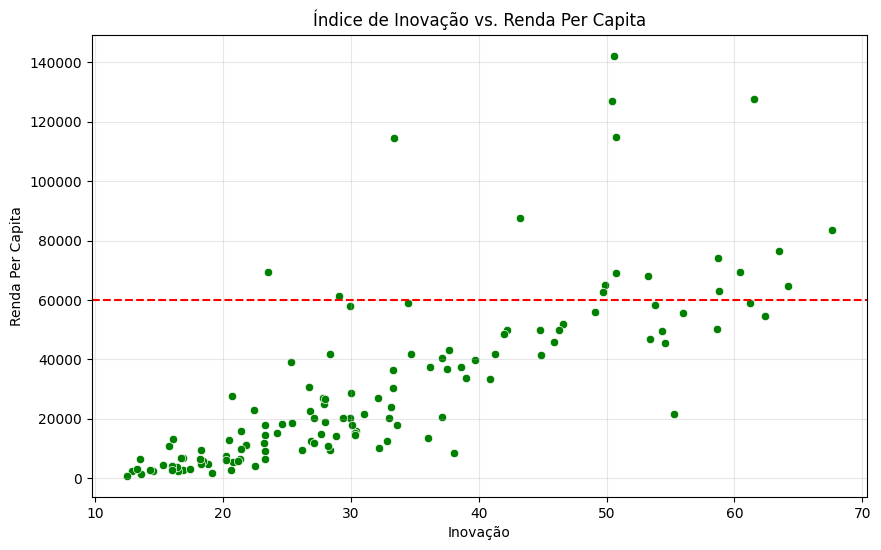

In [ ]:
#vou montar um gr√°fico com os dados de xI e Y
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xI', y='Y', data=dados, color = 'green')
plt.title('√çndice de Inova√ß√£o vs. Renda Per Capita')
plt.xlabel('Inova√ß√£o')
plt.ylabel('Renda Per Capita')
plt.grid(True, alpha = 0.3)
#linha constante na faixa de renda de 30 mil
plt.axhline(y=60000, color='red', linestyle='--')
plt.show()

## A maioria dos pa√≠ses da amostra t√™m renda per capita ppp abaixo da faixa dos US$60 mil.

## Pa√≠ses com √≠ndice de inova√ß√£o abaixo da m√©dia:

In [ ]:
print('M√©dia de inova√ß√£o pelo mundo:')
print(dados['xI'].mean())
print()
print()
abaixo_da_medI = dados[dados['xI'] < dados['xI'].mean()]
print("Pa√≠ses com √≠ndice de inova√ß√£o abaixo da m√©dia:")
print(abaixo_da_medI)

M√©dia de inova√ß√£o pelo mundo:
32.65581395348837


Pa√≠ses com √≠ndice de inova√ß√£o abaixo da m√©dia:
         country    xI    xL      Y       continente
54   Philippines  32.2  59.0  10133             √Åsia
55     Mauritius  32.1  71.5  26906           √Åfrica
56        Kuwait  29.9  58.5  58056             √Åsia
57       Georgia  29.9  68.4  20113           Europa
58    Costa Rica  27.9  67.7  24923  Am√©rica Central
..           ...   ...   ...    ...              ...
124      Uruguay  30.0  69.8  28842   Am√©rica do Sul
125      Armenia  28.0  64.9  18942           Europa
126    Argentina  28.0  49.9  26505   Am√©rica do Sul
127        Benin  16.0  57.7   4056           √Åfrica
128       Uganda  16.0  50.7   2694           √Åfrica

[75 rows x 5 columns]


## Pa√≠ses com √≠ndice de inova√ß√£o acima da m√©dia

In [ ]:
acima_da_medI = dados[dados['xI'] > dados['xI'].mean()]
print("Pa√≠ses com √≠ndice de inova√ß√£o acima da m√©dia:")
print(acima_da_medI)

Pa√≠ses com √≠ndice de inova√ß√£o acima da m√©dia:
                 country    xI    xL       Y        continente
0            Switzerland  67.6  83.0   83598            Europa
1                 Sweden  64.2  77.5   64578            Europa
2          United States  63.5  70.1   76399  Am√©rica do Norte
3         United Kingdom  62.4  68.6   54603            Europa
4              Singapore  61.5  83.5  127565              √Åsia
5                Finland  61.2  76.3   59027            Europa
6            Netherlands  60.4  77.3   69577            Europa
7                Germany  58.8  72.1   63150            Europa
8                Denmark  58.7  77.8   74005            Europa
9            South Korea  58.6  73.1   50070              √Åsia
10                France  56.0  62.5   55493            Europa
11                 China  55.3  48.5   21476              √Åsia
12                 Japan  54.6  67.5   45573              √Åsia
13                Israel  54.3  70.1   49509              √Åsi

## Vamos calcular a renda m√©dia dos pa√≠ses com √≠ndice de inova√ß√£o abaixo da m√©dia:

In [ ]:
renda_media_abaixo_da_medI = abaixo_da_medI['Y'].mean()
print("Renda m√©dia dos pa√≠ses com √≠ndice de inova√ß√£o abaixo da m√©dia: US$",round(renda_media_abaixo_da_medI))

Renda m√©dia dos pa√≠ses com √≠ndice de inova√ß√£o abaixo da m√©dia: US$ 14544


## Vamos fazer o mesmo com os pa√≠ses com inova√ß√£o acima da m√©dia:

In [ ]:
acima_da_medI_renda_media = acima_da_medI['Y'].mean()
print("Renda m√©dia dos pa√≠ses com √≠ndice de inova√ß√£o acima da m√©dia: US$", round(acima_da_medI_renda_media))

Renda m√©dia dos pa√≠ses com √≠ndice de inova√ß√£o acima da m√©dia: US$ 54166


## Diferen√ßa percentual de renda entre esses pa√≠ses

In [ ]:
diferen√ßa = (round(acima_da_medI_renda_media) - round(renda_media_abaixo_da_medI))/round(acima_da_medI_renda_media)
percenteI = round(diferen√ßa * 100)
print("Diferen√ßa percentual m√©dia de renda entre os pa√≠ses com o √≠ndice de inova√ß√£o acima da m√©dia para os pa√≠ses com √≠ndice de inova√ß√£o abaixo da m√©dia:",percenteI,'%')

Diferen√ßa percentual m√©dia de renda entre os pa√≠ses com o √≠ndice de inova√ß√£o acima da m√©dia para os pa√≠ses com √≠ndice de inova√ß√£o abaixo da m√©dia: 73 %


## veja que existe uma diferen√ßa muito grande entre a renda dos pa√≠ses com melhor desempenho em inova√ß√£o, para os de pior desempenho.

## Quero visualizar os dados de renda vs inova√ß√£o para cada grupo:

## Gr√°fico dos pa√≠ses com melhor desempenho em inova√ß√£o:

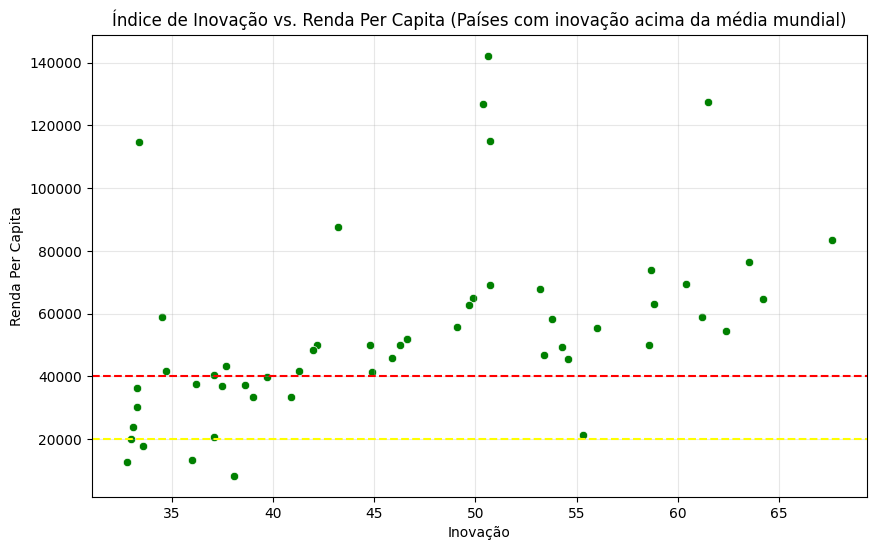

In [ ]:
# Gr√°fico dos pa√≠ses com melhor desempenho em inova√ß√£o:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xI', y='Y', data=acima_da_medI, color = 'green')
plt.title('√çndice de Inova√ß√£o vs. Renda Per Capita (Pa√≠ses com inova√ß√£o acima da m√©dia mundial)')
plt.xlabel('Inova√ß√£o')
plt.ylabel('Renda Per Capita')

#vou colocar uma linha constante na faixa de renda per capita de US$ 40 mil
plt.axhline(y=40000, color='red', linestyle='--')

#vou colocar outra linha na faixa dos US$20 mil
plt.axhline(y=20000, color='yellow', linestyle='--')
plt.grid(True, alpha = 0.3)
plt.show()

## Veja que a maioria desses pa√≠ses est√£o com renda acima dos US$ 40 mil (acima da linha tracejada em vermelha)

## Al√©m disso, que apenas quatro deles possuem renda abaixo da faixa dos US$20 mil (linha tracejada em amarelo)

## Inova√ß√£o vs. Renda per Capita: visualizando isso para pa√≠ses com menor inova√ß√£o

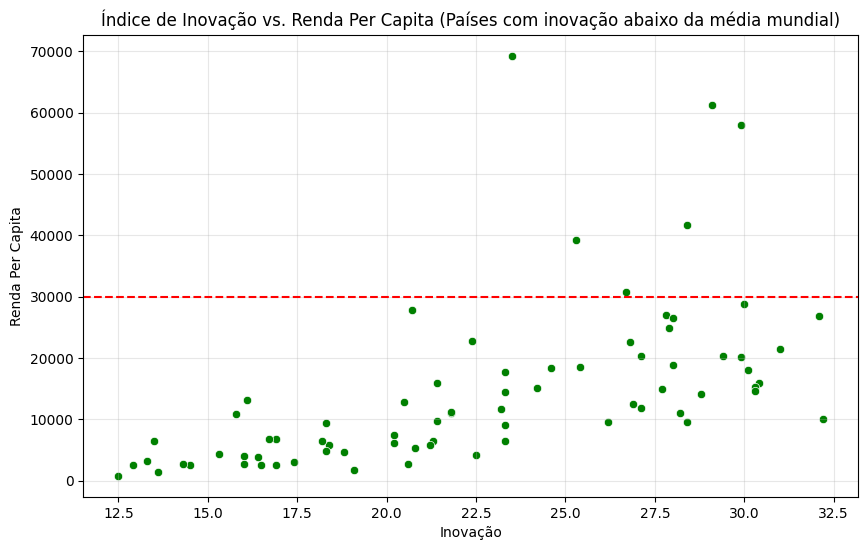

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xI', y='Y', data=abaixo_da_medI, color = 'green')
plt.title('√çndice de Inova√ß√£o vs. Renda Per Capita (Pa√≠ses com inova√ß√£o abaixo da m√©dia mundial)')
plt.xlabel('Inova√ß√£o')
plt.ylabel('Renda Per Capita')
plt.grid(True, alpha = 0.3)

#vou colocar uma linha constante na faixa de renda per capita de US$ 40 mil
plt.axhline(y=30000, color='red', linestyle='--')
plt.show()

In [ ]:
#vou calcular os pa√≠ses com Y acima do 30000 do grupo de pa√≠ses abaixo_da_medI
print('Pa√≠ses com inova√ß√£o abaixo da m√©dia, mas com elevada renda per capita:')
print(abaixo_da_medI[abaixo_da_medI['Y'] > 30000])

Pa√≠ses com inova√ß√£o abaixo da m√©dia, mas com elevada renda per capita:
        country    xI    xL      Y       continente
56       Kuwait  29.9  58.5  58056             √Åsia
72   Kazakhstan  26.7  62.0  30810             √Åsia
78       Brunei  23.5  65.9  69275             √Åsia
87         Oman  28.4  62.9  41724             √Åsia
98       Panama  25.3  64.1  39280  Am√©rica Central
118     Bahrain  29.1  63.4  61228             √Åsia


## A semelhan√ßa entre eles? S√£o todos, com o excess√£o de Om√£ e o Panam√°, grandes produtores de petr√≥leo! O petr√≥leo tem compensado a falta de inova√ß√£o desses pa√≠ses.

## Conclus√£o da rela√ß√£o entre Inova√ß√£o e Renda:
## - pa√≠ses com √≠ndice de inova√ß√£o acima da m√©dia s√£o mais ricos!
## - pa√≠ses sem grandes reservas de petr√≥leo precisam ser inovadores, caso contr√°rio dificilmente conseguem ter um grande Pib per Capita



---



## Vou fazer a mesma an√°lise anterior agora considerando a Liberdade Econ√¥mica:

## Pa√≠ses com √≠ndice de liberdade econ√¥mica abaixo da m√©dia:

In [ ]:
abaixo_da_medL = dados[dados['xL'] < dados['xL'].mean()]
print("Pa√≠ses com √≠ndice de liberdade econ√¥mica abaixo da m√©dia:")
print(abaixo_da_medL)

Pa√≠ses com √≠ndice de liberdade econ√¥mica abaixo da m√©dia:
        country    xI    xL      Y      continente
11        China  55.3  48.5  21476            √Åsia
24        Italy  46.6  60.1  51865          Europa
33      Hungary  41.3  61.2  41907          Europa
37      T√ºrkiye  38.6  56.2  37274          Europa
38        India  38.1  52.9   8379            √Åsia
..          ...   ...   ...    ...             ...
121  Madagascar  19.1  57.3   1774          √Åfrica
122     Algeria  16.1  43.9  13210          √Åfrica
126   Argentina  28.0  49.9  26505  Am√©rica do Sul
127       Benin  16.0  57.7   4056          √Åfrica
128      Uganda  16.0  50.7   2694          √Åfrica

[64 rows x 5 columns]


## Pa√≠ses com liberdade econ√¥mica acima da m√©dia:

In [ ]:
acima_da_medL = dados[dados['xL'] > dados['xL'].mean()]
print("Pa√≠ses com √≠ndice de liberdade econ√¥mica acima da m√©dia:")
print(acima_da_medL)

Pa√≠ses com √≠ndice de liberdade econ√¥mica acima da m√©dia:
                    country    xI    xL       Y        continente
0               Switzerland  67.6  83.0   83598            Europa
1                    Sweden  64.2  77.5   64578            Europa
2             United States  63.5  70.1   76399  Am√©rica do Norte
3            United Kingdom  62.4  68.6   54603            Europa
4                 Singapore  61.5  83.5  127565              √Åsia
..                      ...   ...   ...     ...               ...
119  Bosnia and Herzegovina  27.1  62.0   20377            Europa
120                 Jamaica  27.1  68.1   11822   Am√©rica Central
123                  Mexico  31.0  62.0   21512  Am√©rica do Norte
124                 Uruguay  30.0  69.8   28842    Am√©rica do Sul
125                 Armenia  28.0  64.9   18942            Europa

[65 rows x 5 columns]


## Renda m√©dia para os pa√≠ses com liberdade econ√¥mica abaixo da m√©dia

In [ ]:
renda_media_abaixo_da_medL = abaixo_da_medL['Y'].mean()
print("Renda m√©dia dos pa√≠ses com √≠ndice de liberdade econ√¥mica abaixo da m√©dia: US$",round(renda_media_abaixo_da_medL))

Renda m√©dia dos pa√≠ses com √≠ndice de liberdade econ√¥mica abaixo da m√©dia: US$ 13021


## Renda m√©dia dos pa√≠ses com √≠ndice de liberdade econ√¥mica acima da m√©dia:

In [ ]:
acima_da_medL_renda_media = acima_da_medL['Y'].mean()
print("Renda m√©dia dos pa√≠ses com √≠ndice de liberdade econ√¥mica acima da m√©dia: US$", round(acima_da_medL_renda_media))

Renda m√©dia dos pa√≠ses com √≠ndice de liberdade econ√¥mica acima da m√©dia: US$ 48960


## Diferen√ßa percentual de renda

In [ ]:
# vou calcular a diferen√ßa percentual entre esses pa√≠ses
diferen√ßa_L = (round(acima_da_medL_renda_media) - round(renda_media_abaixo_da_medL))/round(acima_da_medL_renda_media)
print("Diferen√ßa percentual m√©dia de renda entre os pa√≠ses com o √≠ndice de liberdade econ√¥mica acima da m√©dia para os pa√≠ses com √≠ndice de liberdade econ√¥mica abaixo da m√©dia:",round(diferen√ßa_L * 100),'%')

Diferen√ßa percentual m√©dia de renda entre os pa√≠ses com o √≠ndice de liberdade econ√¥mica acima da m√©dia para os pa√≠ses com √≠ndice de liberdade econ√¥mica abaixo da m√©dia: 73 %


## Veja que a diferen√ßa percentual m√©dia da renda entre os mais livres economicamente e os menos livre √© igual a diferen√ßa entre os pa√≠ses mais inovadores e os menos inovadores, dessa amostra

## Liberdade econ√¥mica vs. Renda per Capita: Visualizando o caso dos pa√≠ses com menor liberdade econ√¥mica

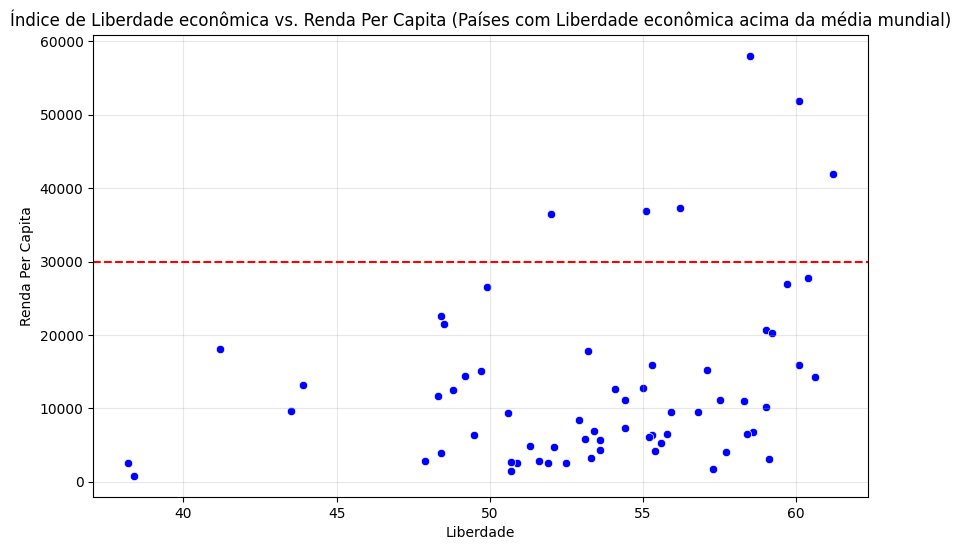

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xL', y='Y', data=abaixo_da_medL, color = 'blue')
plt.title('√çndice de Liberdade econ√¥mica vs. Renda Per Capita (Pa√≠ses com Liberdade econ√¥mica acima da m√©dia mundial)')
plt.xlabel('Liberdade')
plt.ylabel('Renda Per Capita')
plt.grid(True, alpha = 0.3)

#vou colocar uma linha na faixa de renda dos us$ 30 mil
plt.axhline(y=30000, color='red', linestyle='--')
plt.show()

## A maioria dos pa√≠ses menos livres tem renda mais baixa.

## Visualizar agora para os pa√≠ses mais livres economicamente:

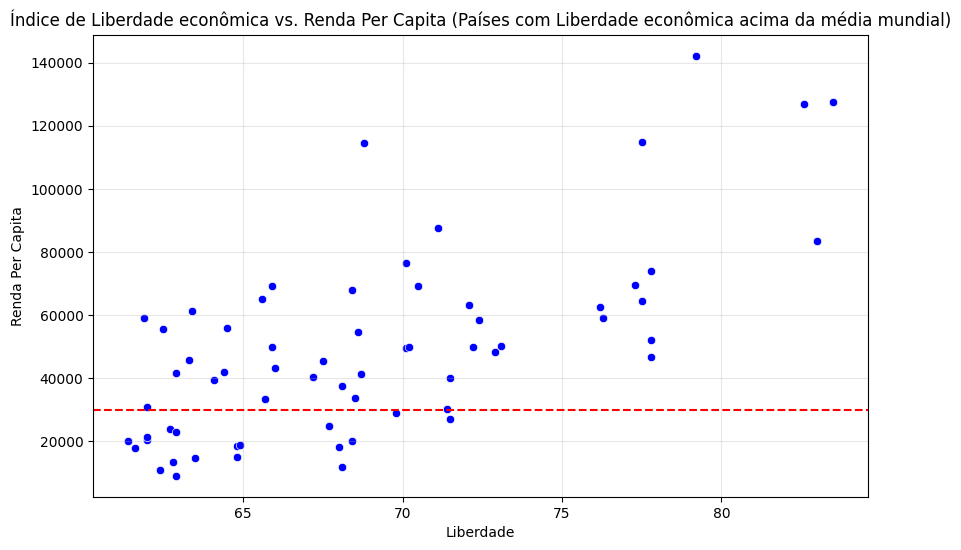

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xL', y='Y', data=acima_da_medL, color = 'blue')
plt.title('√çndice de Liberdade econ√¥mica vs. Renda Per Capita (Pa√≠ses com Liberdade econ√¥mica acima da m√©dia mundial)')
plt.xlabel('Liberdade')
plt.ylabel('Renda Per Capita')
plt.grid(True, alpha = 0.3)

#vou colocar uma linha na faixa de renda dos us$ 30 mil
plt.axhline(y=30000, color='red', linestyle='--')
plt.show()

## Note que a quantidade de pa√≠ses acima dessa faixa do US$30 mil √© bem maior para esse grupo de pa√≠ses. Por√©m, que tamb√©m h√° v√°rios pa√≠ses que mesmo livres, t√™m renda abaixo dessa faixa.

## Vamos tirar algumas conclus√µes acerca da rela√ß√£o entre Liberdade Econ√¥mica e Renda per Capita

----

## 3. Vari√¢ncia e Desvio Padr√£o

In [ ]:
desvio_padrao_Y = dados['Y'].std()

desvio_padrao_xI = dados['xI'].std()

desvio_padrao_xL = dados['xL'].std()


print("Desvio Padr√£o de Y:", desvio_padrao_Y)
print()
print("Desvio Padr√£o de xI:", desvio_padrao_xI)
print()
print("Desvio Padr√£o de xL:", desvio_padrao_xL)

Desvio Padr√£o de Y: 28960.040757091036

Desvio Padr√£o de xI: 14.108839798690616

Desvio Padr√£o de xL: 9.546156297088876


## Disparidade de renda entre os pa√≠ses com maior liberdade econ√¥mica

In [ ]:
acima_da_medL['Y']
dp_Y_acima_da_medL = acima_da_medL['Y'].std()
print("Desvio Padr√£o de Renda para os pa√≠ses com √≠ndice de liberdade econ√¥mica acima da m√©dia: US$",round(dp_Y_acima_da_medL))

Desvio Padr√£o de Renda para os pa√≠ses com √≠ndice de liberdade econ√¥mica acima da m√©dia: US$ 29656


### Veja que as diferen√ßas de renda entre os pa√≠ses com maiores √≠ndices de liberdade econ√¥mica √© alta. Dessa forma, pode-se notar que existe uma alta disparidade entre as rendas de pa√≠ses com elevada liberdade econ√¥mica.

## Vejamos o caso da disparidade de renda entre os pa√≠ses com menor liberdade econ√¥mica

In [ ]:
abaixo_da_medL['Y']
dp_Y_abaixo_da_medL = abaixo_da_medL['Y'].std()
print("Desvio Padr√£o de Renda para os pa√≠ses com √≠ndice de liberdade econ√¥mica abaixo da m√©dia: US$",round(dp_Y_abaixo_da_medL))

Desvio Padr√£o de Renda para os pa√≠ses com √≠ndice de liberdade econ√¥mica abaixo da m√©dia: US$ 12225


## Veja que a diferen√ßa de renda entre os menos livres √© menor.

## 4. Correla√ß√£o

In [ ]:
correlacao_Y_xI = dados[['Y', 'xI']].corr().iloc[0, 1]
correlacao_Y_xL = dados[['Y', 'xL']].corr().iloc[0, 1]
print("Correla√ß√£o entre Renda e Inova√ß√£o:", correlacao_Y_xI)
print()
print("Correla√ß√£o entre Renda e Liberdade Econ√¥mica:", correlacao_Y_xL)
print()
correla√ß√£o_xI_xL = dados[['xI', 'xL']].corr().iloc[0, 1]
print("Correla√ß√£o entre Inova√ß√£o e Liberdade Econ√¥mica:", correla√ß√£o_xI_xL)

Correla√ß√£o entre Renda e Inova√ß√£o: 0.7723983547872895

Correla√ß√£o entre Renda e Liberdade Econ√¥mica: 0.7573607448104864

Correla√ß√£o entre Inova√ß√£o e Liberdade Econ√¥mica: 0.7401587587124917


## Veja que existe uma correla√ß√£o forte entre todas essas tr√™s vari√°veis.



---



---





---



## Distribui√ß√£o e outras visualiza√ß√µes interessantes para verificar a inova√ß√£o pelo mundo:

## Distribui√ß√£o inova√ß√£o ao redor mundo

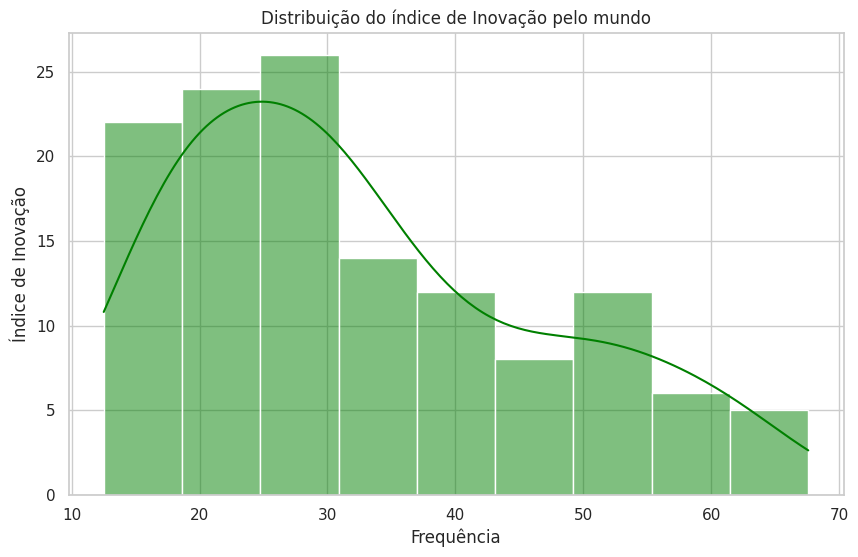

In [ ]:
#Crio uma figura
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(x=dados['xI'], kde=True, color = 'green')
plt.title('Distribui√ß√£o do √≠ndice de Inova√ß√£o pelo mundo')
plt.xlabel('Frequ√™ncia')
plt.ylabel('√çndice de Inova√ß√£o')
plt.show()

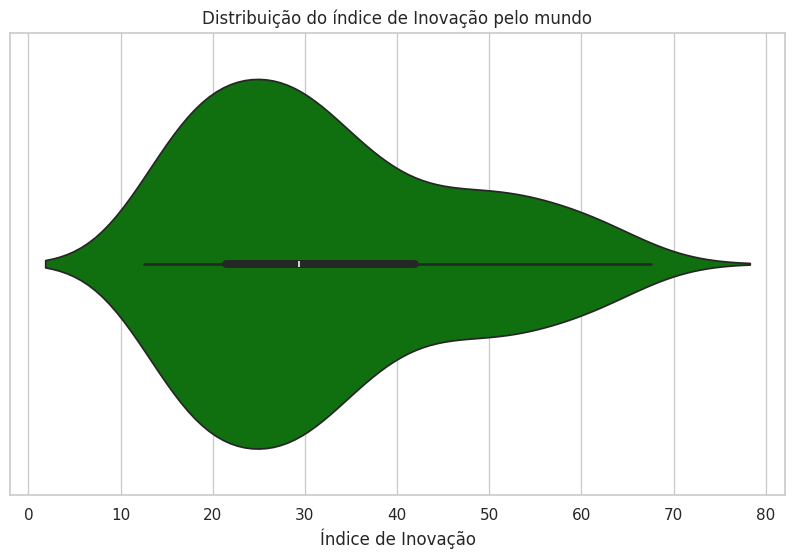

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x=dados['xI'], color = 'green')
plt.title('Distribui√ß√£o do √≠ndice de Inova√ß√£o pelo mundo')
plt.xlabel('√çndice de Inova√ß√£o')
plt.show()

## Essas visualiza√ß√µes evidenciam que o √≠ndice de inova√ß√£o pelo mundo est√° a maior parte concentrada ali na faixa entre 10 e 30 e poucos pontos. O Brasil por exemplo, tem um √≠ndice de inova√ß√£o de 33,6 pontos no √çndice. Estando em 48¬∞ posi√ß√£o.



---



## **Distribui√ß√£o e outras visualiza√ß√µes interessantes para verificar a liberdade econ√¥mica pelo mundo:**

## Distribui√ß√£o liberdade econ√¥mica ao redor mundo

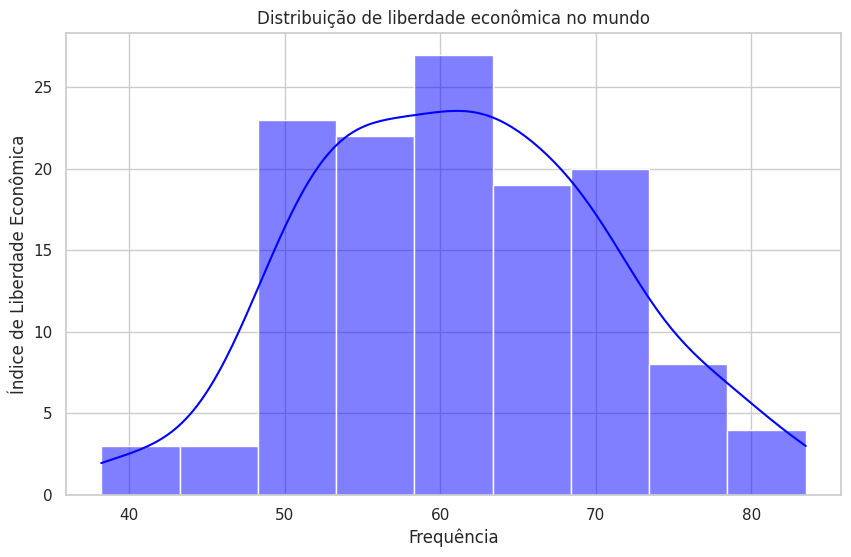

In [ ]:
#Crio uma figura
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(x=dados['xL'], kde=True, color = 'blue')
plt.title('Distribui√ß√£o de liberdade econ√¥mica no mundo')
plt.xlabel('Frequ√™ncia')
plt.ylabel('√çndice de Liberdade Econ√¥mica')
plt.show()

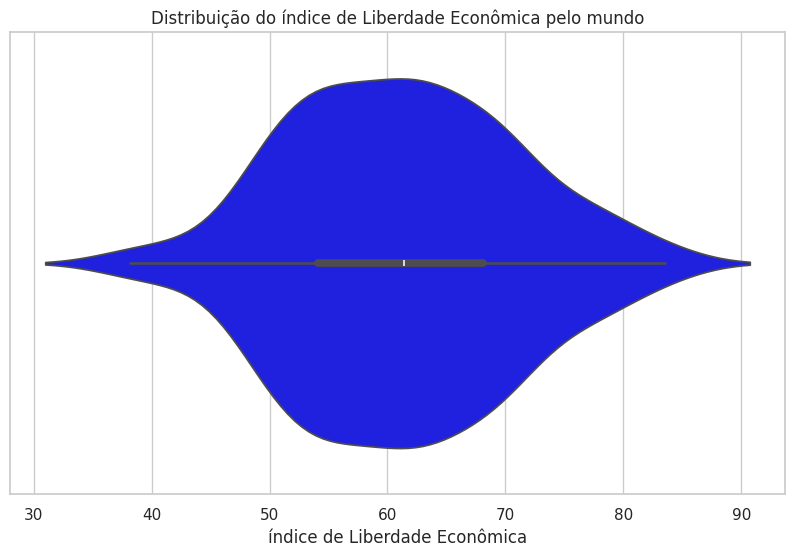

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x=dados['xL'], color = 'blue')
plt.title('Distribui√ß√£o do √≠ndice de Liberdade Econ√¥mica pelo mundo')
plt.xlabel('√≠ndice de Liberdade Econ√¥mica')
plt.show()



---



---



## Modelo de Regress√£o:

In [ ]:
# Fun√ß√£o para ajustar o modelo de regress√£o e retorn√°-lo
def ajustar_modelo(y, X):
    X = sm.add_constant(X)  # Adicionar constante (intercepto) ao modelo
    modelo = sm.OLS(y, X).fit()
    return modelo

In [ ]:
# 1. Regress√£o: Inova√ß√£o (xI) vs. Renda (Y)
modelo_inovacao = ajustar_modelo(dados['Y'], dados['xI'])
print("Regress√£o: Inova√ß√£o (xI) vs. Renda (Y)")
print(modelo_inovacao.summary())

Regress√£o: Inova√ß√£o (xI) vs. Renda (Y)
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     187.8
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           8.38e-27
Time:                        18:24:44   Log-Likelihood:                -1449.3
No. Observations:                 129   AIC:                             2903.
Df Residuals:                     127   BIC:                             2908.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

## Gr√°fico dos dados com a linha de regress√£o

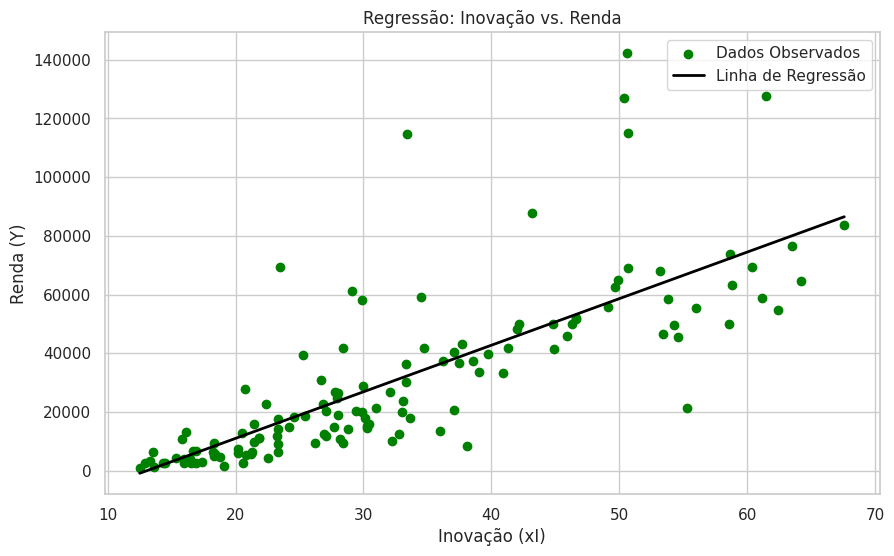

In [ ]:
# Dados para plotagem da linha de regress√£o
x_range = np.linspace(dados['xI'].min(), dados['xI'].max(), 100)
y_pred = modelo_inovacao.predict(sm.add_constant(x_range))


# Plotagem da curva de regress√£o
plt.figure(figsize=(10, 6))
plt.scatter(dados['xI'], dados['Y'], color='green', label='Dados Observados')  # Pontos de dados
plt.plot(x_range, y_pred, color='black', linewidth=2, label='Linha de Regress√£o')  # Linha de regress√£o
plt.xlabel('Inova√ß√£o (xI)')
plt.ylabel('Renda (Y)')
plt.title('Regress√£o: Inova√ß√£o vs. Renda')
plt.legend()
plt.grid(True)
plt.show()

## Interpretando os resultados da Regress√£o Simples Inova√ß√£o vs. Renda per Capita ppc:
### No modelo, a vari√°vel √çndice de Inova√ß√£o (xI) apresenta um coeficiente positivo significativo de 1585.4378 (p < 0.001), indicando que, para cada unidade adicional de Inova√ß√£o, a renda per capita aumenta em m√©dia aproximadamente em US$ 1585. Esse coeficiente revela a magnitude e a dire√ß√£o da rela√ß√£o entre Inova√ß√£o e Renda, demonstrando que n√≠veis mais altos de inova√ß√£o est√£o associados a aumentos substanciais na renda per capita.

### O R¬≤ ajustado √© de 0.593, o que significa que aproximadamente 59.3% da variabilidade na renda per capita pode ser explicada pela vari√°vel Inova√ß√£o dentro do modelo utilizado. Em outras palavras, cerca de 59.3% das diferen√ßas observadas na renda per capita entre os pa√≠ses ou regi√µes estudadas podem ser atribu√≠das √†s varia√ß√µes na Inova√ß√£o, ap√≥s ajustar para o n√∫mero de preditores no modelo. Esse valor de R¬≤ ajustado indica um n√≠vel relativamente alto de explica√ß√£o da variabilidade, sugerindo que a Inova√ß√£o √© um fator crucial para a determina√ß√£o da renda per capita, embora outros fatores tamb√©m possam influenciar significativamente e devam ser considerados para uma an√°lise mais completa.

## Regress√£o Liberdade Econ√¥mica vs. Renda per Capita PPC

In [ ]:
# 2. Regress√£o: Liberdade Econ√¥mica (xL) vs. Renda (Y)
modelo_liberdade = ajustar_modelo(dados['Y'], dados['xL'])
print("\nRegress√£o: Liberdade Econ√¥mica (xL) vs. Renda (Y)")
print(modelo_liberdade.summary())


Regress√£o: Liberdade Econ√¥mica (xL) vs. Renda (Y)
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     170.8
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           2.89e-25
Time:                        18:25:01   Log-Likelihood:                -1452.9
No. Observations:                 129   AIC:                             2910.
Df Residuals:                     127   BIC:                             2915.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

## Visualizar agora a regress√£o xL vs Y

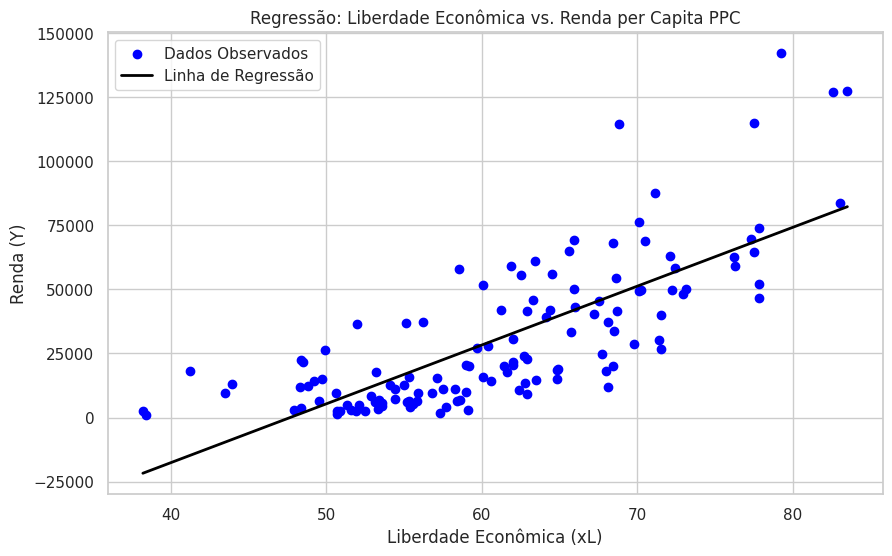

In [ ]:
# Dados para plotagem da linha de regress√£o
x2_range = np.linspace(dados['xL'].min(), dados['xL'].max(), 100)
y2_pred = modelo_liberdade.predict(sm.add_constant(x2_range))

# Plotagem da curva de regress√£o
plt.figure(figsize=(10, 6))
plt.scatter(dados['xL'], dados['Y'], color='blue', label='Dados Observados')
plt.plot(x2_range, y2_pred, color='black', linewidth=2, label='Linha de Regress√£o')
plt.xlabel('Liberdade Econ√¥mica (xL)')
plt.ylabel('Renda (Y)')
plt.title('Regress√£o: Liberdade Econ√¥mica vs. Renda per Capita PPC')
plt.legend()
plt.grid(True)
plt.show()


## Interpretando os resultados da Regress√£o Simples Liberdade Econ√¥mica vs. Renda per Capita ppc:
### A vari√°vel Liberdade Econ√¥mica (xL) mostra um coeficiente positivo significativo de 2297.5947 (p < 0.001), indicando que, para cada unidade adicional de Liberdade Econ√¥mica, a renda per capita aumenta em m√©dia US$2297. Esse coeficiente reflete a magnitude e a dire√ß√£o da associa√ß√£o entre Liberdade Econ√¥mica e Renda, demonstrando que maiores n√≠veis de liberdade econ√¥mica tendem a resultar em maiores n√≠veis de renda per capita.

### O R¬≤ ajustado √© de 0.57, o que significa que aproximadamente 57% da variabilidade na renda per capita pode ser explicada pela vari√°vel Liberdade Econ√¥mica dentro do modelo utilizado. Esse valor de R¬≤ ajustado (coeficiente de determina√ß√£o) um n√≠vel relativamente alto de explica√ß√£o da variabilidade, sugerindo que a Liberdade Econ√¥mica √© um fator crucial para a determina√ß√£o da renda per capita, embora outros fatores tamb√©m possam influenciar significativamente e devam ser considerados para uma an√°lise mais completa.



---



## Regress√£o M√∫ltipla:

In [ ]:
# 3. Regress√£o: Inova√ß√£o (xI) + Liberdade Econ√¥mica (xL) vs. Renda (Y)
modelo_inovacao_liberdade = ajustar_modelo(dados['Y'], dados[['xI', 'xL']])
print("\nRegress√£o: Inova√ß√£o (xI) + Liberdade Econ√¥mica (xL) vs. Renda (Y)")
print(modelo_inovacao_liberdade.summary())


Regress√£o: Inova√ß√£o (xI) + Liberdade Econ√¥mica (xL) vs. Renda (Y)
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     129.6
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           2.69e-31
Time:                        18:55:08   Log-Likelihood:                -1435.8
No. Observations:                 129   AIC:                             2878.
Df Residuals:                     126   BIC:                             2886.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

## Gr√°fico da Regress√£o M√∫ltipla:

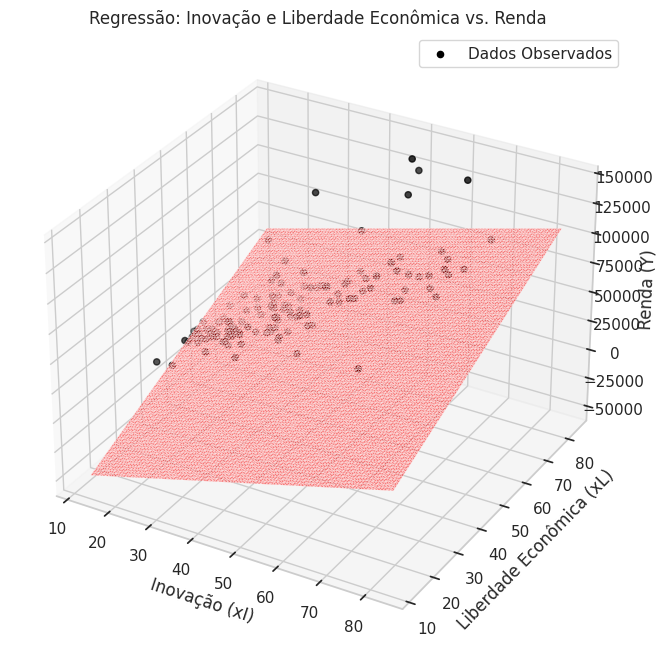

In [ ]:
# Dados para plotagem da linha de regress√£o
x3_range = np.linspace(dados[['xI', 'xL']].min().min(), dados[['xI', 'xL']].max().max(), 100)
x3_grid = np.meshgrid(x3_range, x3_range)
x3_pred = modelo_inovacao_liberdade.predict(sm.add_constant(np.stack(x3_grid, axis=-1).reshape(-1, 2)))

# Plotagem da curva de regress√£o
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dados['xI'], dados['xL'], dados['Y'], c='black', marker='o', label='Dados Observados')
ax.plot_trisurf(np.ravel(x3_grid[0]), np.ravel(x3_grid[1]), np.ravel(x3_pred), color='red', alpha=0.5, linewidth=0.2)

ax.set_xlabel('Inova√ß√£o (xI)')
ax.set_ylabel('Liberdade Econ√¥mica (xL)')
ax.set_zlabel('Renda (Y)')
ax.set_title('Regress√£o: Inova√ß√£o e Liberdade Econ√¥mica vs. Renda')

plt.legend()
plt.show()

## Interpretando os dados da regress√£o m√∫ltipla entre inova√ß√£o + liberdade econ√¥mica vs. Renda per capita ppc:
## Aqui est√£o os principais pontos interpretativos:

## 1 - Coeficientes (coef): S√£o os valores estimados para os coeficientes da regress√£o. No seu caso:
## - Para a constante (intercepto): -76530 (aproximadamente -76,530).
## - Para xI (Inova√ß√£o): 961.6140.
## - Para xL (Liberdade Econ√¥mica): 1245.6609.

## 2 - P>|t|: Indica o valor p associado ao teste de hip√≥tese nula de que o coeficiente √© igual a zero (nenhum efeito). Valores p pequenos (menores que 0.05) indicam que √© improv√°vel que o coeficiente seja zero, sugerindo uma rela√ß√£o estatisticamente significativa com a vari√°vel de resposta (Renda, Y).

## 3 - R-quadrado (R-squared): Mede a propor√ß√£o da variabilidade na vari√°vel dependente (Renda, Y) que √© explicada pelas vari√°veis independentes (Inova√ß√£o e Liberdade Econ√¥mica). Um R-quadrado de 0.673 significa que aproximadamente 67.3% da variabilidade na Renda √© explicada pelas vari√°veis explicativas no modelo.

## 4 - F-statistic: Teste de signific√¢ncia global do modelo. Um valor alto (129.6 neste caso) com um valor p baixo (2.69e-31) sugere que pelo menos uma das vari√°veis explicativas √© significativa para explicar a variabilidade em Y.

## 5 - Omnibus, Skewness, Kurtosis: Testes de normalidade dos res√≠duos. Aqui, o valor baixo de Prob(Omnibus) (0.000) sugere que os res√≠duos n√£o s√£o normalmente distribu√≠dos, o que pode indicar que o modelo pode n√£o capturar completamente todos os padr√µes nos dados. Isso √© um problema! Vou tentar os meios para resolver isso aqui.

## Em resumo, o modelo indica que tanto a Inova√ß√£o quanto a Liberdade Econ√¥mica t√™m impacto significativo na vari√°vel de resposta Renda, com um bom ajuste geral do modelo (R-quadrado de 0.673).

## A seguir preciso testar as hip√≥teses do modelo de regress√£o linear para tornar o modelo mais robusto e estat√≠sticamente mais preciso.



---



---



---



## Teste das Hip√≥teses do Modelo de Regress√£o Linear:

## Vou testar uma hip√≥tese do Modelo de Regress√£o Linear chamada de Multicolinearidade - ela pressup√µe que pode ocorrer um vi√©s no modelo caso aja uma grande correla√ß√£o linear entre as vari√°veis explicativas
## O n√£o cumprimento dessa hip√≥tese, falando resumidamente, √© que o n√£o cumprimento dele pode tornar muitas vezes as estimativas dos coeficientes dos par√¢metros (Œ≤'s) insignificantes.

## Carrego essa funcionalidade da biblioteca statmodels para testar se a hip√≥tese de Multicolinearidade est√° sendo cumprida

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df = pd.DataFrame(dados)

# Adicione a constante ao modelo
X = sm.add_constant(df[['xI', 'xL']])

# Calcula o VIF para cada vari√°vel explicativa
vif_data = pd.DataFrame()
vif_data['Variavel'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  Variavel        VIF
0    const  55.638083
1       xI   2.211582
2       xL   2.211582


## An√°lise do resultado da VIF:

## A constante (intercepto) apresenta um VIF de 55.638083. Isso indica que h√° uma alta correla√ß√£o entre a constante e as outras vari√°veis explicativas no modelo.
## No entanto, perceba que os VIFs das vari√°veis explicativas xI e xL, que s√£o de aproximadamente 2.21 cada, est√£o abaixo de 5. VIFs abaixo de 5 geralmente indicam que a multicolinearidade n√£o √© um problema significativo para essas vari√°veis, o que √© um bom sinal.
## Com base nesse c√°lculo p√¥de-se concluir que a Multicolinearidade n√£o √© um problema dos grandes aqui.

## Hip√≥tese de normalidade dos res√≠duos:

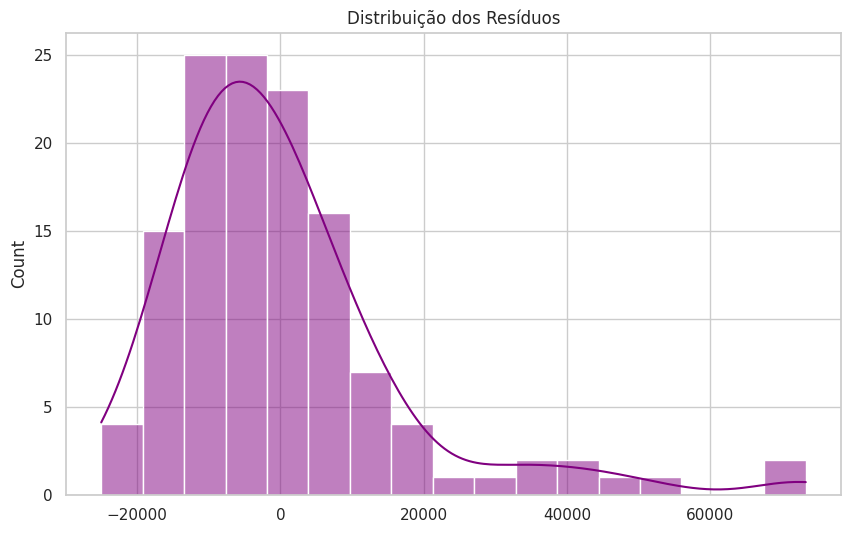

In [ ]:
# vou testar se os res√≠duos seguem uma distribui√ß√£o normal

#Obtenho os res√≠duos
residuos = modelo_inovacao_liberdade.resid

#Coloco ele em um gr√°fico
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color = 'purple')
plt.title('Distribui√ß√£o dos Res√≠duos')
plt.show()

## Olhando a forma da Distribui√ß√£o, observamos que ela parece estar levemente assim√©trica para a direita (positiva). Isso significa que h√° mais res√≠duos positivos (maiores que zero) do que res√≠duos negativos (menores que zero).

## Veja abaixo uma distribui√ß√£o assim√©trica para a direita:

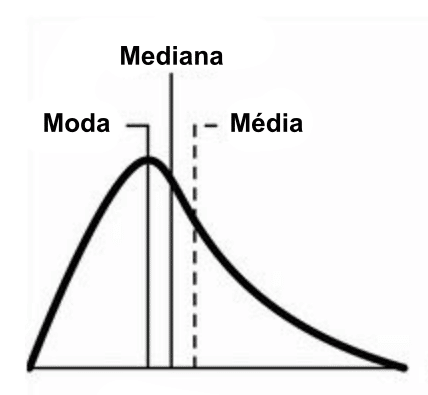

Nela: "o pico da distribui√ß√£o est√° do lado esquerdo e os dados se espalham em dire√ß√£o ao lado positivo da escala, criando uma cauda que se estende para a direita. A moda √© a menor medida descritiva (sempre a encontramos no ponto mais alto da curva), em seguida temos a mediana e a m√©dia, que √© maior por ser sens√≠vel aos valores extremos positivos. Nessa situa√ß√£o os dados est√£o concentrados abaixo da m√©dia." Fonte: https://blog.proffernandamaciel.com.br/assimetria-e-curtose-dos-dados/

In [ ]:
from scipy.stats import shapiro

In [ ]:
#Teste de Shapiro-Wilk
shapiro_test = shapiro(residuos)
print("Estat√≠stica de teste:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)

# Interpreta√ß√£o do teste
alpha = 0.10
if shapiro_test.pvalue > alpha:
    print("Os res√≠duos parecem seguir uma distribui√ß√£o normal (n√£o rejeitamos H0)")
else:
    print("Os res√≠duos n√£o seguem uma distribui√ß√£o normal (rejeitamos H0)")

Estat√≠stica de teste: 0.8304557800292969
Valor p: 6.930986340414336e-11
Os res√≠duos n√£o seguem uma distribui√ß√£o normal (rejeitamos H0)


## Devemos ent√£o concluir que o Modelo em quest√£o n√£o segue o pressuposto exigido pelo modelo de Regress√£o linear M√∫ltiplo de Distribui√ß√£o normal dos res√≠duos.

## Vou realizar uma transforma√ß√£o logar√≠tmica para tentar lidar com isso.

## Por que usar a transforma√ß√£o logar√≠tmica?

## - Normalidade dos Res√≠duos: A transforma√ß√£o logar√≠tmica pode ajudar a normalizar a distribui√ß√£o dos res√≠duos, especialmente se os dados originais s√£o positivamente assim√©tricos (com uma cauda longa √† direita).
## -Redu√ß√£o da Heterocedasticidade: Transformar as vari√°veis pode ajudar a estabilizar a vari√¢ncia dos res√≠duos ao longo da faixa de valores das vari√°veis preditoras.
## - Lineariza√ß√£o das Rela√ß√µes: Em muitos casos, as rela√ß√µes entre vari√°veis podem ser n√£o-lineares. Tomar o logaritmo pode linearizar essas rela√ß√µes, facilitando o ajuste do modelo.

## Como a transforma√ß√£o foi aplicada?

## - Vari√°vel Dependente (Y): A vari√°vel dependente Y foi transformada para log_Y usando a fun√ß√£o logar√≠tmica natural (log‚Å°(Y)log(Y)).
## - Vari√°veis Independentes (xI e xL): As vari√°veis independentes xI e xL tamb√©m foram transformadas para log_xI e log_xL, respectivamente, usando a fun√ß√£o logar√≠tmica natural (log‚Å°(xI)log(xI) e log‚Å°(xL)log(xL)).

## Al√©m disso, vou alterar o n√≠vel de signific√¢ncia (Œ±) para 0.10 em vez de 0.05, o que significa que estou tornando o teste menos rigoroso, aumentando a probabilidade de n√£o rejeitar a hip√≥tese nula (H0).

## Vamos l√°:

## Transforma√ß√£o logar√≠tmica:

In [ ]:
dados['log_Y'] = np.log(dados['Y'])
dados['log_xI'] = np.log(dados['xI'])
dados['log_xL'] = np.log(dados['xL'])

## Novo modelo de regress√£o com os dados transformados:

In [ ]:
# vou fazer um modelo de regress√£o m√∫ltiplo a partir desses dados tranformados:
reg = sm.OLS(dados['log_Y'], sm.add_constant(dados[['log_xI', 'log_xL']]))
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  log_Y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     228.1
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           1.34e-42
Time:                        19:20:03   Log-Likelihood:                -96.356
No. Observations:                 129   AIC:                             198.7
Df Residuals:                     126   BIC:                             207.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6553      1.377     -2.655      0.0

In [ ]:
# Obter os res√≠duos do novo modelo ajustado
residuos_transformados = res.resid

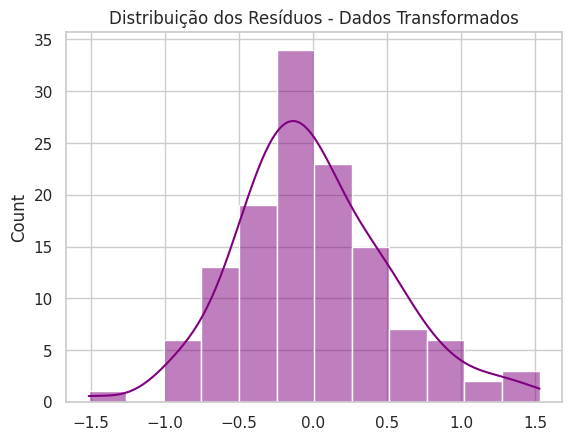

In [ ]:
# Visualizar a distribui√ß√£o dos res√≠duos
sns.histplot(residuos_transformados, kde=True, color = 'purple')
plt.title('Distribui√ß√£o dos Res√≠duos - Dados Transformados')
plt.show()

## Parece bem pr√≥xima de uma distribui√ß√£o normal!

## Vamos realizar outro teste de Shapiro, que √© o melhor teste para detectar essse problema:

In [ ]:
# Realizar o teste de Shapiro-Wilk nos res√≠duos transformados
shapiro_test_transformados = shapiro(residuos_transformados)
print("Estat√≠stica de teste:", shapiro_test_transformados.statistic)
print("Valor p:", shapiro_test_transformados.pvalue)

# Interpreta√ß√£o do teste com n√≠vel de signific√¢ncia = 0.10
alpha = 0.10
if shapiro_test_transformados.pvalue > alpha:
    print("Os res√≠duos parecem seguir uma distribui√ß√£o normal (n√£o rejeitamos H0) üôåüòé")
else:
    print("Os res√≠duos n√£o seguem uma distribui√ß√£o normal (rejeitamos H0)üò¢")

Estat√≠stica de teste: 0.9835441708564758
Valor p: 0.12068634480237961
Os res√≠duos parecem seguir uma distribui√ß√£o normal (n√£o rejeitamos H0) üôåüòé


## Teste de Kolmogorov-Smirnov, que √© menos exato e pode errar diante de uma amostra muito grande:

In [ ]:
from scipy.stats import kstest

# Teste de Kolmogorov-Smirnov
ks_test = kstest(residuos_transformados, 'norm')
print('Teste de Kolmogorov-Smirnov')
print('Estat√≠stica:', ks_test.statistic)
print('Valor p:', ks_test.pvalue)

# Interpreta√ß√£o do teste
if ks_test.pvalue > alpha:
    print("Os res√≠duos parecem seguir uma distribui√ß√£o normal (n√£o rejeitamos H0) üôåüòé")
else:
    print("Os res√≠duos n√£o seguem uma distribui√ß√£o normal (rejeitamos H0) üò¢")

Teste de Kolmogorov-Smirnov
Estat√≠stica: 0.20706075361763857
Valor p: 2.5003113483804914e-05
Os res√≠duos n√£o seguem uma distribui√ß√£o normal (rejeitamos H0) üò¢


## Conclus√£o sobre a hip√≥tese de normalidade:

## Com base nos resultados e nas considera√ß√µes acima, voc√™ pode concluir que:

## -Normalidade Aproximada: Os res√≠duos parecem seguir uma distribui√ß√£o aproximadamente normal ap√≥s a transforma√ß√£o logar√≠tmica, conforme indicado pelo teste de Shapiro-Wilk e pela visualiza√ß√£o do gr√°fico de Distribui√ß√£o.
## -Resultados Confi√°veis: O uso de erros padr√£o robustos melhora a confiabilidade dos coeficientes de regress√£o, mesmo que os res√≠duos n√£o sejam perfeitamente normais.
## -Teste KS: A rejei√ß√£o da normalidade pelo teste de Kolmogorov-Smirnov pode ser uma consequ√™ncia de sua sensibilidade em amostras grandes (a amostra √© 129 pa√≠ses, de um total de 195 pa√≠ses no mundo) e deve ser interpretada com cautela.

## Portanto, parece razo√°vel prosseguir com a an√°lise e infer√™ncias com base no modelo transformado, dado que a aproxima√ß√£o √† normalidade foi alcan√ßada e as ferramentas estat√≠sticas apropriadas foram utilizadas para tratar quaisquer pequenas viola√ß√µes das suposi√ß√µes. Al√©m disso, √© importante continuar monitorando a adequa√ß√£o do modelo e, se necess√°rio, explorar outras transforma√ß√µes ou t√©cnicas de modelagem.

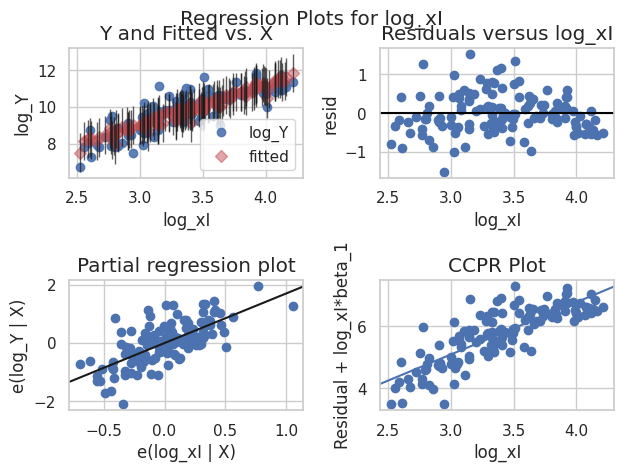

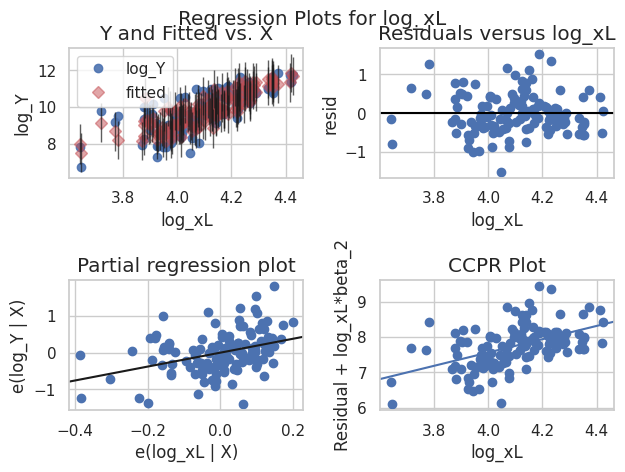

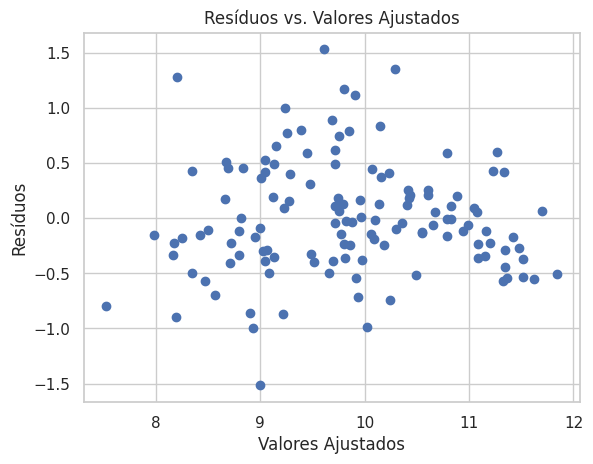

Teste de Breusch-Pagan
Estat√≠stica: 4.641040655721627
Valor p: 0.09822246442083096


In [ ]:
import statsmodels.api as sm

# Gr√°ficos de diagn√≥stico do modelo ajustado
sm.graphics.plot_regress_exog(res, 'log_xI')
sm.graphics.plot_regress_exog(res, 'log_xL')
plt.show()

# Plotando res√≠duos versus valores ajustados para verificar homocedasticidade
plt.scatter(res.fittedvalues, residuos_transformados)
plt.xlabel('Valores Ajustados')
plt.ylabel('Res√≠duos')
plt.title('Res√≠duos vs. Valores Ajustados')
plt.show()

# Teste de Breusch-Pagan para homocedasticidade
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuos_transformados, res.model.exog)
print('Teste de Breusch-Pagan')
print('Estat√≠stica:', bp_test[0])
print('Valor p:', bp_test[1])


## Com base nos gr√°ficos e no teste de Breusch-Pagan, podemos concluir que o modelo de regress√£o linear √© um bom modelo para os dados, ap√≥s a transforma√ß√£o logar√≠tmica, tornando-o mais preciso. A rela√ß√£o entre a vari√°vel dependente (log_Y) e as vari√°veis ‚Äã‚Äãindependentes (log_xI e log_xL) √© linear e homoced√°stica.

## O trunfo, foi ajustar os dados logaritmicamente. Viva o Log!
## Mas tamb√©m perceba que esse modelo tem suas limita√ß√µes.

## Nova Modelagem de Regress√£o M√∫ltipla:

In [88]:
import statsmodels.api as sm

# Ajustar o modelo com erros padr√£o robustos √† heterocedasticidade
reg = sm.OLS(dados['log_Y'], sm.add_constant(dados[['log_xI', 'log_xL']]))
res_robust = reg.fit(cov_type='HC3')

# Exibir o resumo do modelo ajustado com erros padr√£o robustos
print(res_robust.summary())


                            OLS Regression Results                            
Dep. Variable:                  log_Y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     238.9
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           1.35e-43
Time:                        20:01:45   Log-Likelihood:                -96.356
No. Observations:                 129   AIC:                             198.7
Df Residuals:                     126   BIC:                             207.3
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6553      1.585     -2.306      0.0



---



---



# Conclus√£o do Trabalho:


---



## A despeito de todas as limita√ß√µes desse estudo, tem-se que os resultados obtidos destacam que tanto a Inova√ß√£o quanto a Liberdade Econ√¥mica t√™m impactos positivos significativos na determina√ß√£o da renda, com a inova√ß√£o aparentando ter um impacto ainda maior. Este estudo tamb√©m revelou que a combina√ß√£o desses dois fatores no mesmo modelo explica de forma mais abrangente a variabilidade na renda, evidenciando a import√¢ncia desses elementos sendo utilizados em conjunto e de forma inteligente para a din√¢mica econ√¥mica.

## Os dados corroboram a ideia de que a inova√ß√£o √© crucial e que um ambiente econ√¥mico baseado no livre mercado √© fundamental para um pa√≠s que deseja melhorar o n√≠vel de renda per capita. Esses resultados sustentam o ideal liberal de que a liberdade econ√¥mica √© relevante e tem um impacto predominantemente positivo para uma na√ß√£o. Al√©m disso, refor√ßam um conceito amplamente aceito entre os economistas sobre os efeitos ben√©ficos da inova√ß√£o na economia.

## A modelagem estat√≠stica ficou interessante e a despeito de suas limita√ß√µes parecem corroborar a ideia principal obtida atrav√©s desse trabalho. Colocando essa modelagem no contexto geral e todas as demonstra√ß√µes feitas por esse trabalho, conclu√≠mos que sim: essa modelagem corrobora que inova√ß√£o e liberdade econ√¥micas combinadas na m√©dia implicam aumento de renda per capita, considerando a paridade de poder compra, em um pa√≠s.

## Portanto, os achados deste breve estudo s√£o significativos e podem gerar insights valiosos para a elabora√ß√£o de pol√≠ticas p√∫blicas e estrat√©gias de desenvolvimento que visem aumentar a prosperidade econ√¥mica.

# **END.**